In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.pipeline import Pipeline


### 1. Read the dataset (tab, csv, xls, txt, inbuilt dataset)


In [2]:
ecom=pd.read_csv('C:/Users/samsung/Desktop/Great lakes/supervised_learning/Final exam/SLR_DATASET/Ecommerce.csv')
ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### 2. Summarize important observations from the data set


#### a. What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)


In [3]:
print("No of rows & columns:",ecom.shape)

No of rows & columns: (500, 8)


In [4]:
ecom.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

#### b. Calculate five-point summary for numerical variables

In [6]:
ecom.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


#### c. Summarize observations for categorical variables – no. of categories, % observations in each category


In [7]:
ecom.describe(include="object")

,Email,Address,Avatar
count,500,500,500
unique,500,500,138
top,theresamitchell@martin-chambers.biz,"1995 Susan Locks Suite 760\nEast Cheryl, AR 37...",GreenYellow
freq,1,1,7


In [124]:
ecom['Avatar'].value_counts()

122    7
20     7
52     7
13     7
128    7
10     6
23     6
6      6
106    6
98     6
33     6
2      6
37     6
72     6
130    6
131    6
110    6
38     6
92     6
25     5
97     5
68     5
27     5
86     5
81     5
79     5
77     5
70     5
62     5
19     5
      ..
55     2
0      2
49     2
82     2
44     2
45     2
64     2
63     2
42     2
35     2
75     2
78     2
58     2
32     2
136    1
4      1
66     1
61     1
83     1
111    1
109    1
73     1
16     1
17     1
105    1
103    1
102    1
101    1
93     1
39     1
Name: Avatar, Length: 138, dtype: int64

In [ ]:
ecom['Email'].value_counts()

Summary:  There are 3 categorical features. Email and Adress have all unique values.

### 3. Check for defects in the data. Perform necessary actions to ‘fix’ these defects. Some pointers which would help you, but don’t be limited by these

#### a. Do variables have missing/null values?


In [9]:
ecom.isnull().sum()


Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

Inference: There are no missing values in the dataset.

##### b. Do variables have outliers?


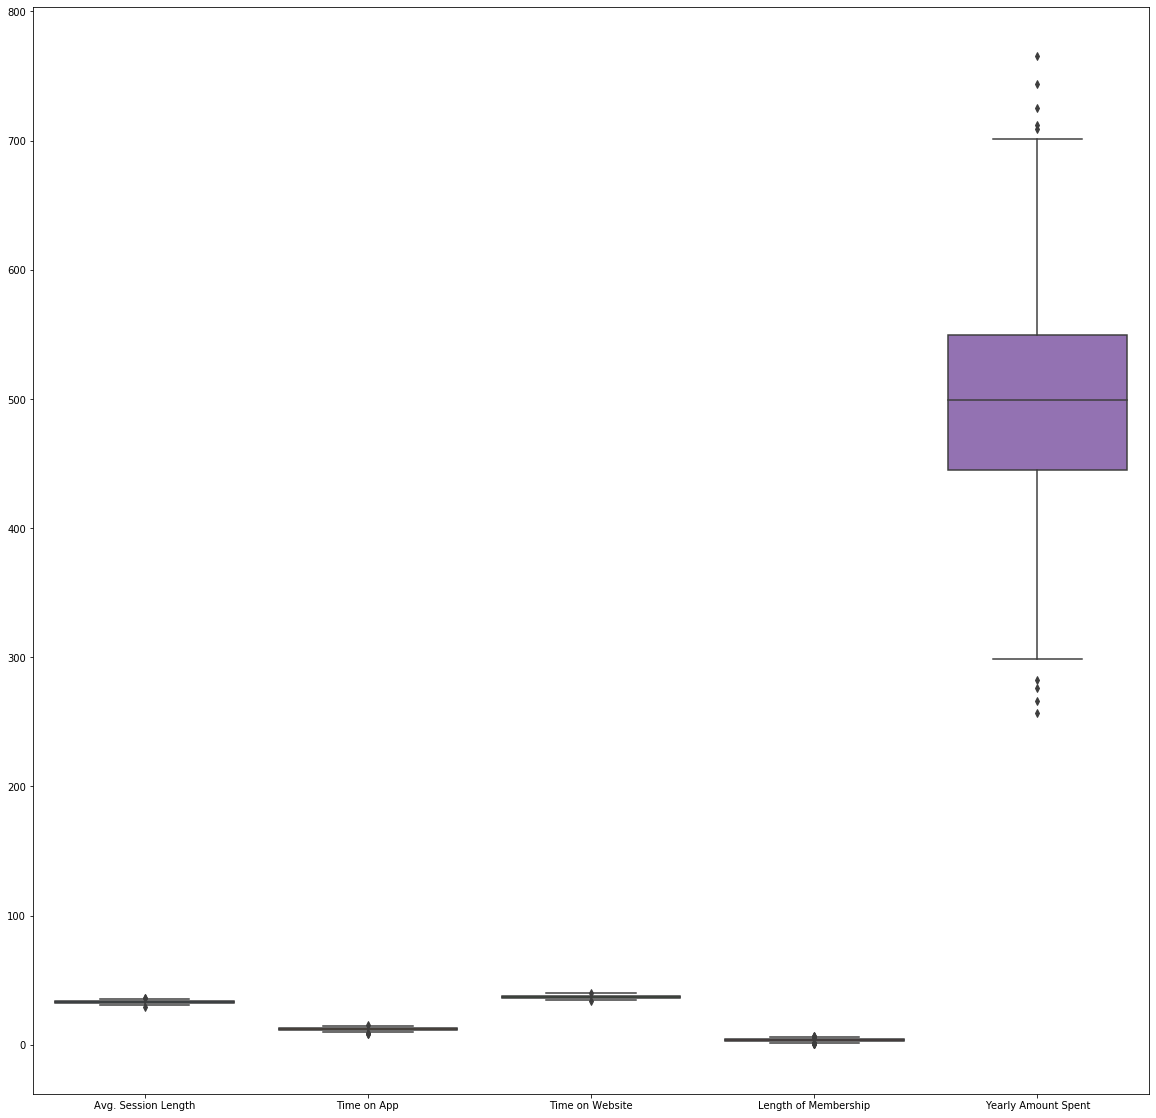

In [10]:
plt.figure(figsize = (20,20))
sns.boxplot(data=ecom)


Inference: The outliers are seen in the dependent variable.

In [11]:
ecom['Yearly Amount Spent'].describe()

count    500.000000
mean     499.314038
std       79.314782
min      256.670582
25%      445.038277
50%      498.887875
75%      549.313828
max      765.518462
Name: Yearly Amount Spent, dtype: float64

In [12]:
Upper_limit = 549.313828 + 1.5 * (549.313828-445.038277)
Lower_limit = 445.038277 - 1.5 * (549.313828-445.038277)
print('Upper_limit :', Upper_limit)
print('Lower_limit :', Lower_limit)

Upper_limit : 705.7271544999999
Lower_limit : 288.62495050000007


In [13]:
ecom1 = ecom[ecom['Yearly Amount Spent']>705.7271544999999]
print(ecom1.shape)
ecom2 = ecom[ecom['Yearly Amount Spent']<288.62495050000007]
print(ecom2.shape)

(5, 8)
(4, 8)


In [14]:
#Treating outliers

In [15]:
ecom = ecom[ecom['Yearly Amount Spent']<705.7271544999999]
ecom.shape

(495, 8)

In [16]:
ecom = ecom[ecom['Yearly Amount Spent']>288.62495050000007]
ecom.shape

(491, 8)

#### c. Is the target variable normally distributed?


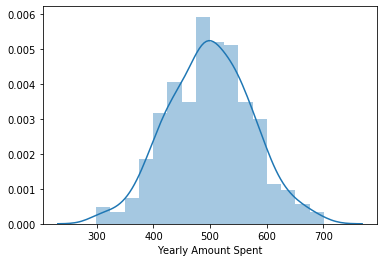

In [17]:
sns.distplot(ecom['Yearly Amount Spent'])

Inference: We can see that the target variable is normally distributed.

#### We are dropping the categorical column address and email address as all the values are unique and its doesn't have effect on the yearly amout spent. label encoding Avatar.


In [112]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
ecom['Avatar']= label_encoder.fit_transform(ecom['Avatar']) 
  
ecom['Avatar'].head() 

0    132
1     25
2      6
3    114
4     80
Name: Avatar, dtype: int64

In [113]:
ecom.columns

Index(['Avatar', 'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

### 4. Summarize relationships among variables


#### a. Plot correlation plots. Which are the variables most correlated with Target? Which independent variables are correlated among themselves? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?

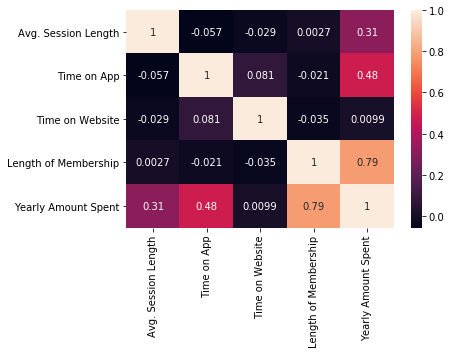

In [18]:
sns.heatmap(ecom.corr(), annot=True)

Inference: 
With respect to target--> Length of membership is highly correlated to the target variable. Also, Time on App and Avg. session length are correlated to the target variable.

with respect to the independent variables being correlated among themselves:There is no high correlationship among any of the independent variable. Hence, we will continue with all the features.

I am dropping Email and address.

In [19]:
ecom.drop(axis=1,columns='Email',inplace=True)

In [20]:
ecom.drop(axis=1,columns='Address',inplace=True)

#### b. Plot all independent variables with the target. Are all relationships linear? If not, what steps would you take based on this information?

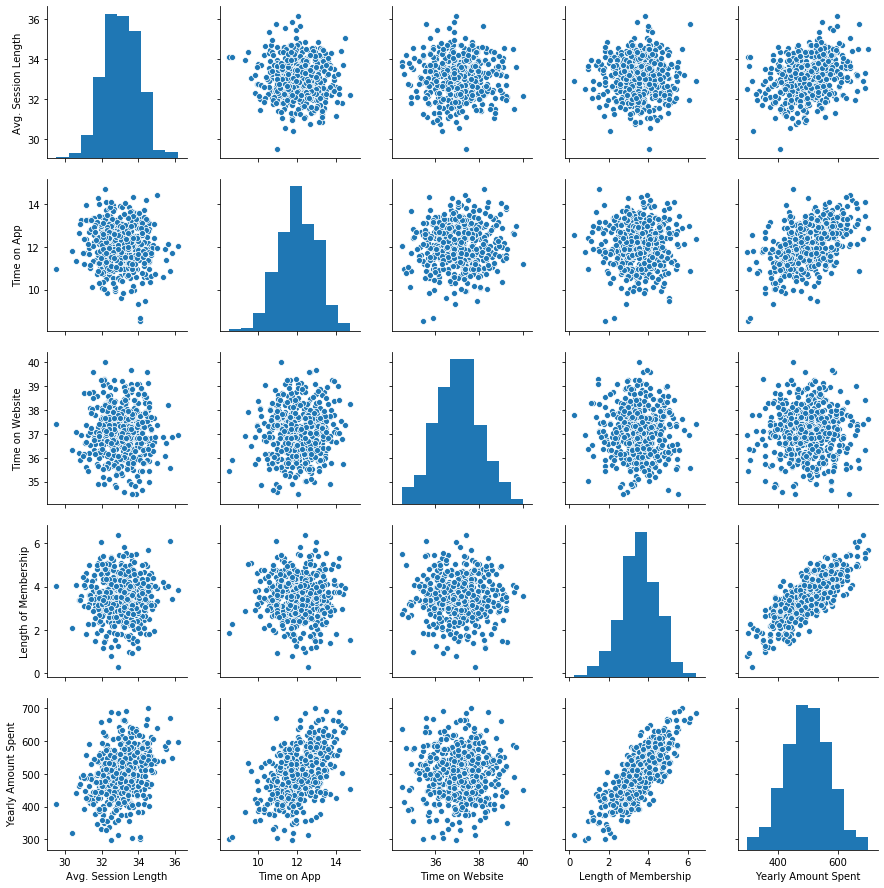

In [22]:
sns.pairplot(ecom);


In [23]:
# Creating a linear model plot of Yearly Amount Spent vs. Length of Membership.

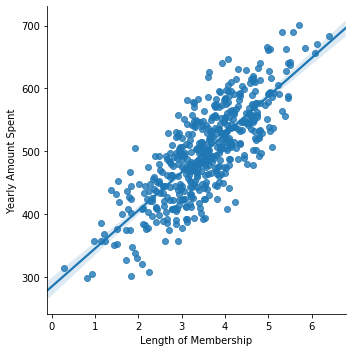

In [24]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=ecom);


Inference: Length of Membership' and 'Yearly Amount Spent follows linearity.

In [115]:
X = ecom[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership','Avatar']]
y= ecom['Yearly Amount Spent']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#import statsmodels.api as sm
#sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

## 5. Split dataset into train and test (70:30)

##### a.Are both train and test representative of the overall data?

##### How would you ascertain this statistically?

In [117]:
X = ecom[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership','Avatar']]
y = ecom["Yearly Amount Spent"]


In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [119]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(343, 5)
(148, 5)
(148,)


From the shape of the test and train, we can confirm that the train and test represents the overall data

### 6. Fit a base model. Please write your key observations


In [120]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print(f'Coefficients: {lm.coef_}')
print(f'Intercept: {lm.intercept_}')
print(f'R^2 score: {lm.score(X, y)}')

Coefficients: [2.59069365e+01 3.84125410e+01 6.54091070e-02 6.16093609e+01
 9.83343588e-04]
Intercept: -1040.2515048581454
R^2 score: 0.9816677354975282


In [121]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.982
Model:                             OLS   Adj. R-squared:                  0.982
Method:                  Least Squares   F-statistic:                     5218.
Date:                 Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                         13:27:17   Log-Likelihood:                -1824.3
No. Observations:                  491   AIC:                             3661.
Df Residuals:                      485   BIC:                             3686.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1045.7765     23.650    -44.219      0.000   -1092.246    -999.307
Avg. Session Length     25.5976      0.463     55.250      0.000      24.687      26.508
Time on App             38.6849      0.463     83.543      0.000      37.775      39.595
Time on Website          0.4084      0.453      0.903      0.367      -0.481       1.298
Length of Membership    61.4478      0.473    129.984      0.000      60.519      62.377
Avatar                   0.0079      0.011      0.717      0.474      -0.014       0.029
==============================================================================
Omnibus:                        0.438   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.803   Jarque-Bera (JB):                0.297
Skew:                          -0.044   Prob(JB):                        0.862
Kurtosis:                       3.081   Cond. No.                     4.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
print(f'R^2 score for train: {lm.score(X_train, y_train)}')
print(f'R^2 score for test: {lm.score(X_test, y_test)}')

R^2 score for train: 0.9801360339791172
R^2 score for test: 0.9842224162238883


#### a. What is the overall R2? Please comment on whether it is good or not.


The R^2 score is 0.981 for the model.
R^2 score for train: 0.9801357035259458
R^2 score for test: 0.9842092818905781

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line. The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

We can say that ~ 98 % of the variation of Yearly Amount Spent is explained by this linear regression model. Its good.

#### b. Do the prediction using test data and add the predicted values as a new column to your dataframe.


In [93]:
predictions = lm.predict(X_test)
predictions.shape
pd.DataFrame(predictions).to_csv("C:/Users/samsung/Desktop/Great lakes/supervised_learning/Final exam/SLR_DATASET/Ecommerce.csv",index=False)

Text(0, 0.5, 'Predicted Y')

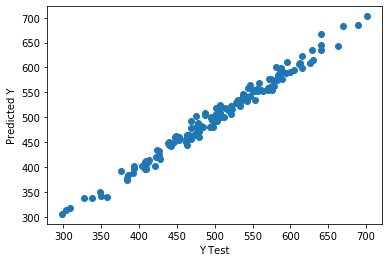

In [43]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#### c. Which variables are significant?


In [45]:
cor=ecom.corr()
#Correlation with output variable
cor_target = abs(cor["Yearly Amount Spent"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Length of Membership    0.787866
Yearly Amount Spent     1.000000
Name: Yearly Amount Spent, dtype: float64

variable Length of Membership is highly correlated with target variable and is significant.These are the final features given by Pearson correlation.

#### d. Is there multi-collinearity?

In [49]:
#Test for multicolinearity:
#VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,Avg. Session Length,Time on App,Time on Website,Length of Membership
vif,1.003925,1.010064,1.008369,1.001532


Inference: Since, all values for VIF is 1, there is no multi-collinearity.

#### e. What are the RMSE and MAPE values of the model?


In [58]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))


RMSE: 10.252701493568534
MAE: 8.277971402146674
MSE: 105.11788791622243


Inference: Since the RMSE value is less, the model has the necessary features.

In [52]:
#mean absolute percentage error (MAPE)
def mean_absolute_percentage_error(y_test,predictions): 
    y_test, predictions = np.array(y_test), np.array(predictions)
    return np.mean(np.abs((y_test - predictions) / y_test)) * 100

In [54]:
print("MAPE:",np.mean(np.abs((y_test - predictions) / y_test)) * 100)

MAPE: 1.6781497241610828


## 7. How do you improve the accuracy of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. 


In [57]:
lm.score(X_train,y_train)

0.9801357035259458

###### Using Ridge

In [63]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01) 
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [64]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [67]:
train_score=lm.score(X_train, y_train)
test_score=lm.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

In [68]:
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.9801357035259458
linear regression test score: 0.9842092818905781
ridge regression train score low alpha: 0.9801357022257943
ridge regression test score low alpha: 0.9842095239285548
ridge regression train score high alpha: 0.9105258632193852
ridge regression test score high alpha: 0.9138251393530764


In [78]:
rr.score(X_train,y_train)

0.9801357022257943

##### Using Regularization -Elastic Net

In [70]:
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import r2_score

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

In [71]:
cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=2000,
             n_alphas=100, n_jobs=-1, normalize=True, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [72]:
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.00557686
Optimal l1_ratio: 1.000
Number of iterations 5


In [73]:
model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
model.fit(X_train, y_train)

ElasticNet(alpha=0.005576855796651495, copy_X=True, fit_intercept=True,
           l1_ratio=1.0, max_iter=5, normalize=True, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [74]:
print(r2_score(y_train, model.predict(X_train))) # training data performance
print(r2_score(y_test, model.predict(X_test))) # test data performance

0.9801274178691197
0.9841970430097357


In [75]:
model.score(X_train,y_train)

0.9801274178691197

##### Using grid search

In [99]:
from sklearn.model_selection import GridSearchCV
lambdas=np.linspace(1,100,100)
params={'alpha':lambdas}
md=Ridge(fit_intercept=True)

In [100]:
grid_search=GridSearchCV(md,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [83]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,...
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.]

In [84]:
grid_search.best_estimator_

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [85]:
grid_search.cv_results_

{'mean_fit_time': array([0.00359771, 0.00249791, 0.00249798, 0.00249846, 0.00239854,
        0.00259829, 0.00229855, 0.00249846, 0.00229871, 0.00239854,
        0.00239825, 0.00269864, 0.00239847, 0.00379653, 0.00329835,
        0.00249763, 0.00229845, 0.00259862, 0.00239849, 0.00309801,
        0.00339725, 0.00409758, 0.00409663, 0.00489626, 0.00499547,
        0.00319757, 0.00359812, 0.00279846, 0.00329878, 0.00349739,
        0.00269823, 0.0029983 , 0.00329769, 0.00359702, 0.00359716,
        0.00339811, 0.00299783, 0.00329788, 0.00279849, 0.00289817,
        0.00409687, 0.00289824, 0.0032984 , 0.0022984 , 0.00239856,
        0.0023984 , 0.00239849, 0.00309796, 0.00249875, 0.0025986 ,
        0.00249879, 0.00209901, 0.00289812, 0.00229852, 0.00259824,
        0.00399871, 0.00499711, 0.00429535, 0.00359845, 0.0028986 ,
        0.00279799, 0.00259826, 0.00259821, 0.00229867, 0.00299852,
        0.00229862, 0.00239847, 0.0022985 , 0.00269854, 0.00299845,
        0.00239859, 0.00299807,

In [90]:
test_pred=grid_search.predict(X_test)
ridge_model=grid_search.best_estimator_
ridge_model.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [91]:
ridge_model.score(X_train,y_train)

0.9801227960905072

Inference: The ridge and the base model are giving the highest accuracy of 0.9801357022257943.
   I have gone for ridge regularisation, because the number of features are less.

## 8. Summarize as follows


#### a. Summarize the overall fit of the model and list down the measures to prove that it is a good model.

The accuracy score of the model 0.9801357022257943. As the score of the model is high it is a good model.
Also the test score is significantly equal with the test score, so the model is generalised model.

#### b. Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.

In [101]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.910766
Time on App,38.410117
Time on Website,0.065949
Length of Membership,61.608784


Focussing on Membership length is more fruitful to improve the Yearly amount spent. Also, the Membership length can be increases by focussing on the Avg. session length and the Time spent on the App.

Coefficients interpreting

Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.910766 total dollars spent.
Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.410117 total dollars spent.
Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.065949 total dollars spent.
Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.608784 total dollars spent.


#### c. What changes from the base model had the most effect on model performance?


I can see that there is no significant change from the base model, but ridge is giving a score some what similar to the base model.

#### d. What are the key risks to your results and interpretation?

I couldn't face any key risk to the result. But the grid search and Elastic Net didn't provide the expected accuracy.
Also,  I have treated the outliers.